### **A. Business Problem**
**Problem Statement**
Gaming industry is an interesting field to explore, it would be fun knowing who the most popular publishers and developers are and which games are the most popular.

Dataset https://docs.google.com/spreadsheets/d/1z46qH9il8OfVkYBZMMDUYq_GYHp77_prgkKq6HysZts/edit#gid=1485085913 

**Content Data**
- Name: Name of the game
- Sales: Sales of the game in Milions
- Series: Series of the game
- Release: Release date of the game
- Genre: Genre of the game
- Developer: Developer of the game

### **B. Data Preparation & Cleansing**

Import Library

In [23]:
import pandas as pd                #Library used for working with data sets and perform data analysis
import numpy as np                 #To perform mathematical operasion and statistics
from datetime import datetime      #Used to work with date and time
import matplotlib.pyplot as plt    #Used for data visualization
import seaborn as sns              #Used for data visualization

Import Dataset

In [24]:
df=pd.read_csv('data.csv')
df['Release'] = pd.to_datetime(df['Release']) #Convert the Release column (data string) to datetime
df = df.drop_duplicates() #remove duplicated data

print(df.info)
df.head(10) #Show the first 10 rows of the data

<bound method DataFrame.info of                                      Name  Sales          Series    Release  \
0           PlayerUnknown's Battlegrounds   42.0             NaN 2017-12-01   
1                               Minecraft   33.0       Minecraft 2011-11-01   
2                              Diablo III   20.0          Diablo 2012-05-01   
3                             Garry's Mod   20.0             NaN 2006-11-01   
4                                Terraria   17.2             NaN 2011-05-01   
..                                    ...    ...             ...        ...   
170                              Vietcong    1.0        Vietcong 2003-03-01   
171    Warhammer Online: Age of Reckoning    1.0       Warhammer 2008-09-01   
172        Who Wants to Be a Millionaire?    1.0             NaN 1999-11-01   
173  Wing Commander 3: Heart of the Tiger    1.0  Wing Commander 1994-12-01   
174                            Zoo Tycoon    1.0      Zoo Tycoon 2001-10-01   

                   

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,11.0,StarCraft,1998-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,11.0,The Sims,2000-02-01,Life simulation,Maxis,Electronic Arts


### **C. Answer**

The Oldest Game

In [25]:
df[['Name','Release']].sort_values('Release').head() #The oldest game
#kalau sort_values biasanya data dari yang terkecil ke terbesar

,Name,Release
133,Hydlide,1984-12-01
34,Where in the World Is Carmen Sandiego?,1985-06-01
88,International Karate,1985-11-01
162,Tetris,1988-01-01
22,Last Ninja 2,1988-08-01


The Newest Game

In [26]:
df[['Name','Release']].sort_values('Release', ascending = False).head()
# kalau sort values mau dari terbesar ke terkecil tambahkan ascending=False


,Name,Release
20,Valheim,2021-02-01
27,Cyberpunk 2077,2020-12-01
110,Crusader Kings III,2020-09-01
10,Fall Guys,2020-08-01
139,Mordhau,2019-04-01


Which Publisher Published Most of The Game?

In [27]:
agg_publisher = df.groupby('Publisher', as_index=False)['Name'].nunique() #unique agar tidak ada data yang sama #as_index=False agar index tidak berubah
agg_publisher.sort_values('Name', ascending=False) #ascending=False agar data dari terbesar ke terkecil

#agg = aggregate

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


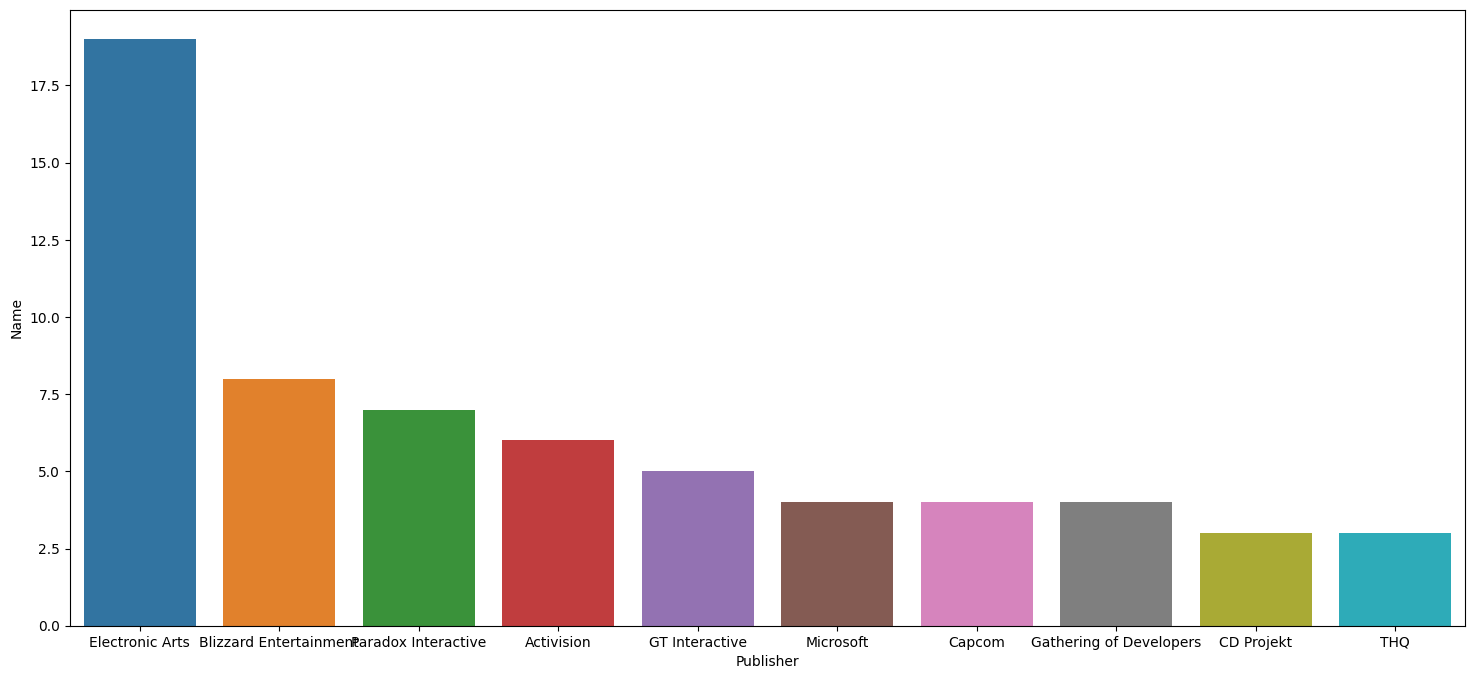

In [28]:
top_publishers = agg_publisher.sort_values('Name', ascending=False).head(10)
plt.rcParams['figure.figsize'] = (18, 8) #ukuran plot
sns.barplot(x='Publisher', y='Name', data=top_publishers) #sns.barplot untuk membuat bar plot
plt.show() #untuk menampilkan plot

Which developer developed most of the games?

In [29]:
agg_developer = df.groupby('Developer', as_index=False)['Name'].nunique() #unique agar tidak ada data yang sama #as_index=False agar index tidak berubah
agg_developer.sort_values('Name', ascending=False) #ascending=False agar data dari terbesar ke terkecil

#agg = aggregate

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4
...,...,...
48,Introversion Software,1
47,Infocom,1
44,Heuristic Park,1
42,Gray Matter Interactive,1


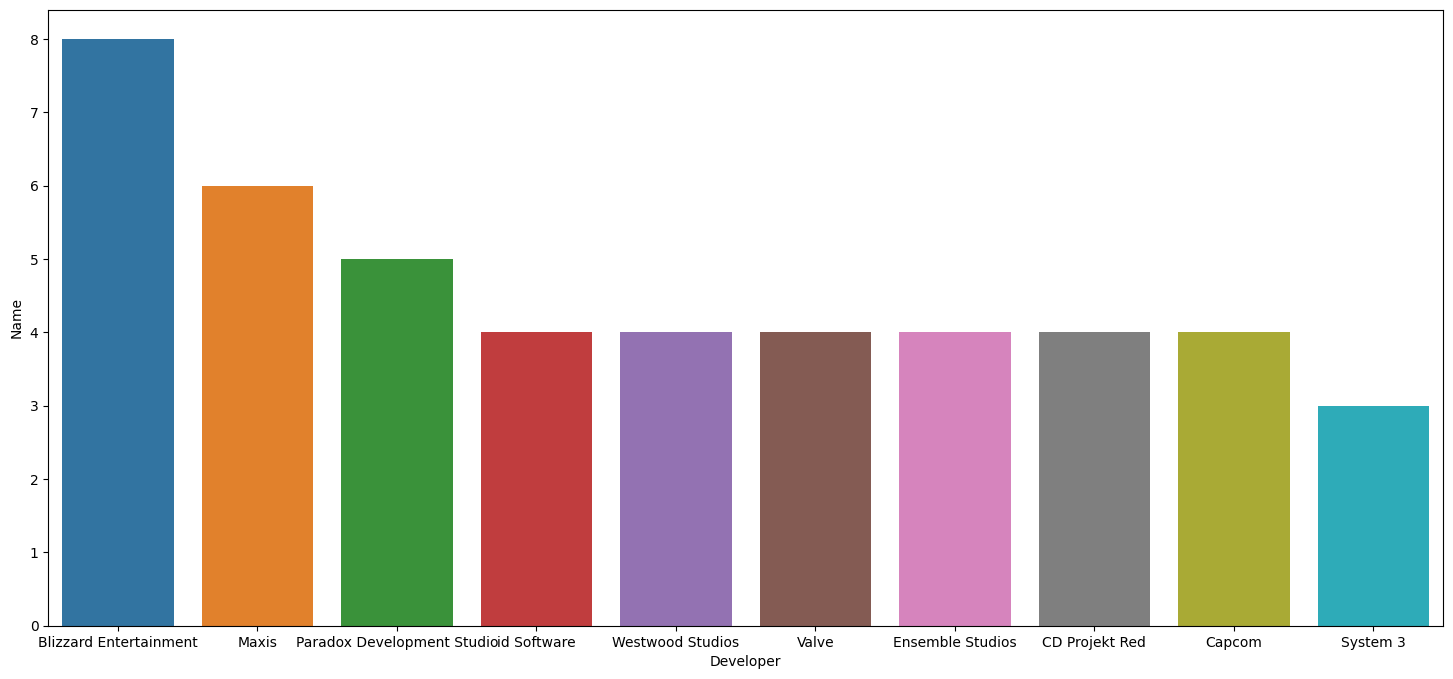

In [30]:
top_developers = agg_developer.sort_values('Name', ascending=False).head(10)
plt.rcParams['figure.figsize'] = (18, 8) #ukuran plot
sns.barplot(x='Developer', y='Name', data=top_developers) #sns.barplot untuk membuat bar plot
plt.show() #untuk menampilkan plot

Which series has the most sales?

In [31]:
agg_series = df.groupby('Series', as_index=False).agg({'Sales':'sum','Name':'nunique'}) #unique agar tidak ada data yang sama #as_index=False agar index tidak berubah
agg_series.sort_values('Sales', ascending=False) #ascending=False agar data dari terbesar ke terkecil

#agg = aggregate

,Series,Sales,Name
47,Minecraft,33.0,1
22,Diablo,26.0,3
75,The Sims,24.0,3
36,Half-Life,21.0,2
85,Warcraft,19.0,3
...,...,...,...
60,RoboCop,1.0,1
46,Microsoft Flight Simulator,1.0,1
58,Railroad Tycoon,1.0,1
56,Psychonauts,1.0,1


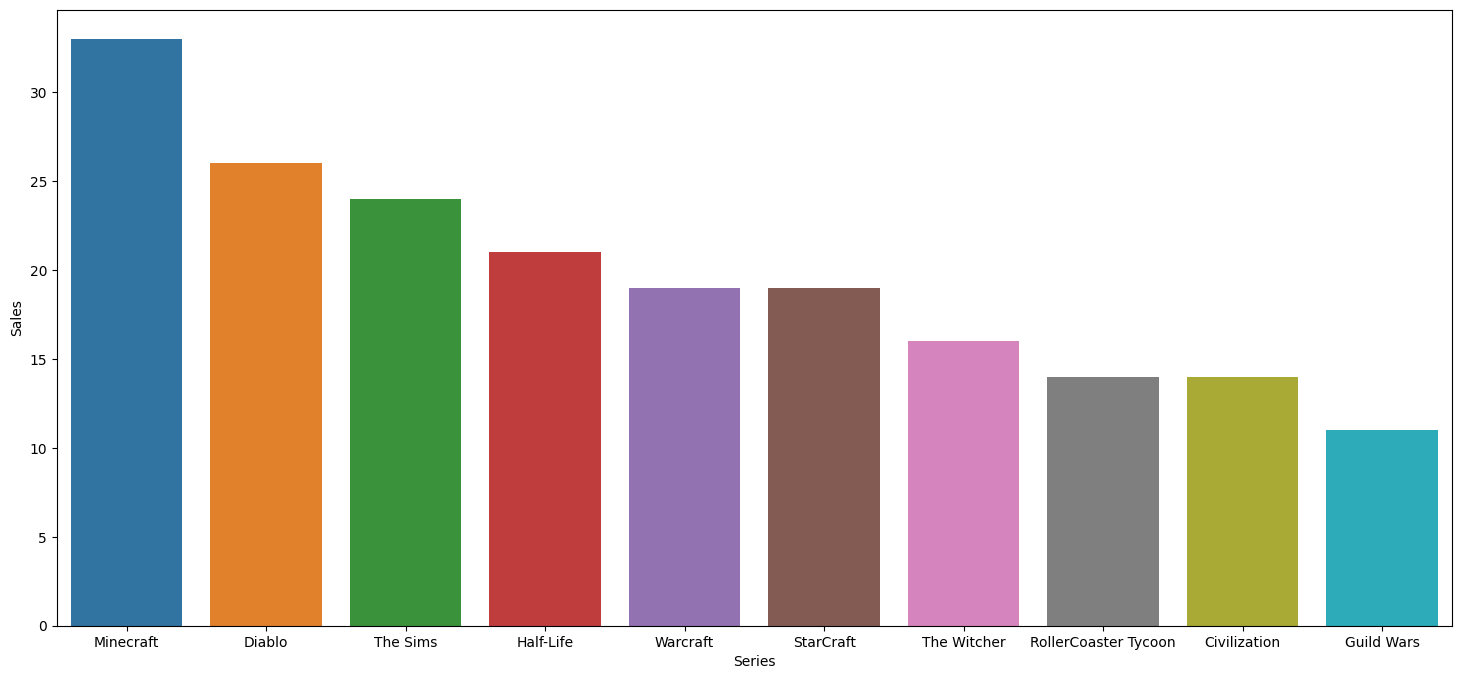

In [32]:
top_sales = agg_series.sort_values('Sales', ascending=False).head(10)
plt.rcParams['figure.figsize'] = (18, 8) #ukuran plot
sns.barplot(x='Series', y='Sales', data=top_sales) #sns.barplot untuk membuat bar plot
plt.show() #untuk menampilkan plot

Which series has the most games?

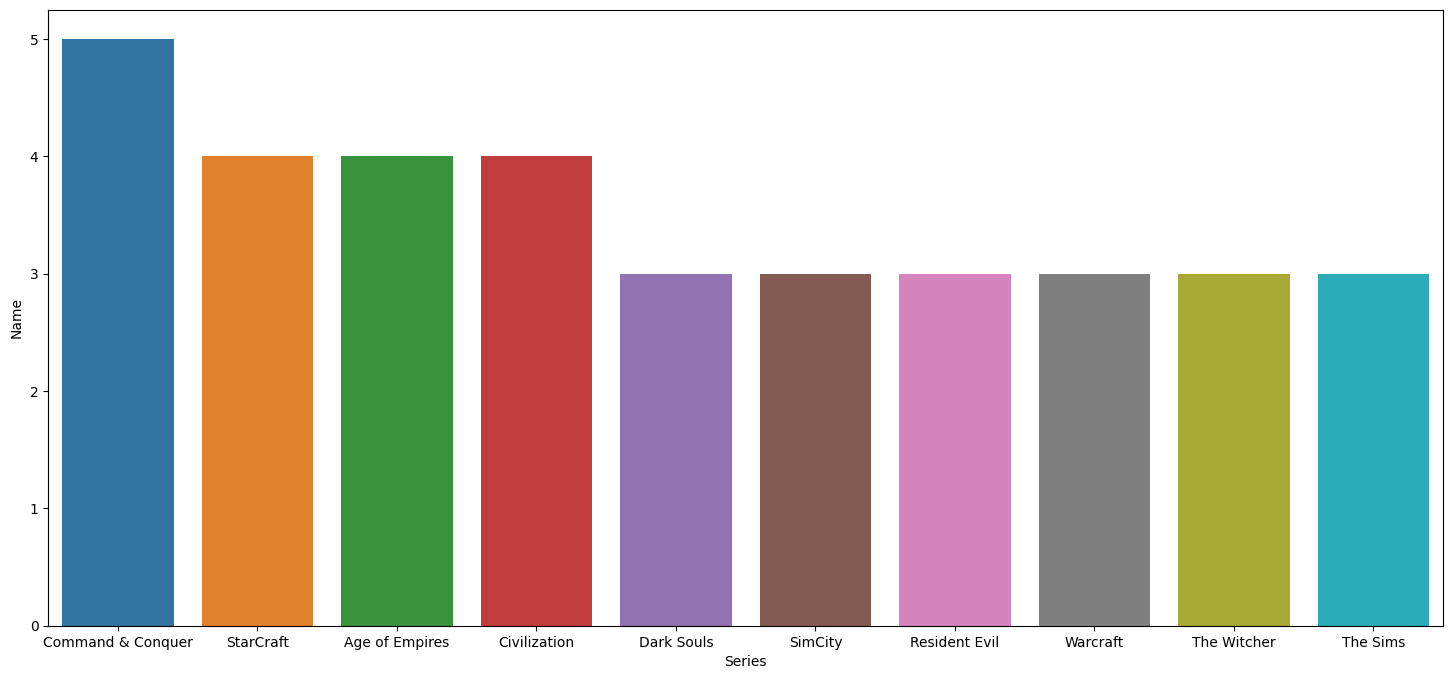

In [33]:
top_seriess = agg_series.sort_values('Name', ascending=False).head(10)
plt.rcParams['figure.figsize'] = (18, 8) #ukuran plot
sns.barplot(x='Series', y='Name', data=top_seriess) #sns.barplot untuk membuat bar plot
plt.show() #untuk menampilkan plot